## Imports

In [1]:
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt
import copy
from mxnet import nd, autograd, gluon

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:442: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2210: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mlab.py:2892: DeprecationWarning: invalid escape sequence \|
  delete = set("""~!@#$%^&*()-=+~\|]}[{';: /?.>,<""")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:190: DeprecationWarning: invalid escape sequence \S
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\patches.py:515: DeprecationWarning: invalid escape sequence \ 
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:78: DeprecationWarning: invalid escape sequence \p
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:442: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mathtext.py:474: DeprecationWar

## Set Contexts as in GPU

In [2]:
data_ctx=mx.gpu()
model_ctx=mx.gpu()

In [3]:
def transform(data,label):
    #templabel=label.astype(np.float32)
    #print(label)
#     if templabel in range(10):
#         if templabel==1.0 or templabel==2.0:
#             return data.astype(np.float32)/255,label.astype(np.float32)
#     else:
    return data.astype(np.float32)/255,label.astype(np.float32)

In [4]:
MNIST_train=mx.gluon.data.vision.MNIST(train=True,transform=transform)
MNIST_test=mx.gluon.data.vision.MNIST(train=False,transform=transform)

In [5]:
MyMNIST_train12=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,3):
        MyMNIST_train12.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train12)
print(train_data_length)

MyMNIST_test12=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,3):
        MyMNIST_test12.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test12)
print(test_data_length)


MyMNIST_train123=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,4):
        MyMNIST_train123.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train123)
print(train_data_length)

MyMNIST_test123=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test123.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test123)
print(test_data_length)

MyMNIST_train1234=[]
for i in range(len(MNIST_train)):
    if MNIST_train[i][1] in range(1,5):
        MyMNIST_train1234.append((MNIST_train[i]))
train_data_length=len(MyMNIST_train1234)
print(train_data_length)

MyMNIST_test1234=[]
for i in range(len(MNIST_test)):
    if MNIST_test[i][1] in range(1,4):
        MyMNIST_test1234.append((MNIST_test[i]))
test_data_length=len(MyMNIST_test1234)
print(test_data_length)

12700
2167
18831
3177
24673
3177


In [20]:
24673%64

33

## Load MNIST data

In [6]:
num_inputs=784
num_outputs=10
batch_size=64
num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data12=gluon.data.DataLoader(MyMNIST_train12,batch_size,shuffle=True)
test_data12=gluon.data.DataLoader(MyMNIST_test12,batch_size,shuffle=False)


# num_inputs=784
# num_outputs=10
# batch_size=64
# num_examples=60000

#train_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True, transform=transform),
#                                      batch_size, shuffle=True)
#test_data = gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False, transform=transform),
#                                     batch_size, shuffle=False)
    
train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data123=gluon.data.DataLoader(MyMNIST_train123,batch_size,shuffle=True)
test_data123=gluon.data.DataLoader(MyMNIST_test123,batch_size,shuffle=False)

train_data1234=gluon.data.DataLoader(MyMNIST_train1234,batch_size,shuffle=True)
test_data1234=gluon.data.DataLoader(MyMNIST_test1234,batch_size,shuffle=False)

## Transfer to limited cases(eg: only 1 and 2)

Each item in mx.gluon.data.vision.MNIST is a tuple of (data, label)

## Allocate parameters

In [7]:
num_hidden=30
#weight_scale=.01
weight_scale=.005

W1=nd.random_normal(shape=(num_inputs,num_hidden),scale=weight_scale,ctx=model_ctx)
b1=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# W2=nd.random_normal(shape=(num_hidden,num_hidden),scale=weight_scale,ctx=model_ctx)
# b2=nd.random_normal(shape=num_hidden,scale=weight_scale,ctx=model_ctx)

# W3=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
# b3=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

W2=nd.random_normal(shape=(num_hidden,num_outputs),scale=weight_scale,ctx=model_ctx)
b2=nd.random_normal(shape=num_outputs,scale=weight_scale,ctx=model_ctx)

#params=[W1,b1,W2,b2,W3,b3]
params=[W1,b1,W2,b2]
for param in params:
    param.attach_grad()
print(params[2][0])


[ 0.0013763  -0.00418942 -0.00404138  0.00146266  0.00070939 -0.00431283
  0.00104529 -0.00067148  0.009062    0.00243959]
<NDArray 10 @gpu(0)>


## Activation functions

In [8]:
def relu(X):
    return nd.maximum(X,nd.zeros_like(X))

## Softmax output

In [9]:
def softmax(y_linear):
    exp=nd.exp(y_linear-nd.max(y_linear))
    partion=nd.nansum(exp,axis=0,exclude=True).reshape((-1,1))
    return exp/partition

## The softmax cross-entropy loss function

In [10]:
def cross_entropy(yhat,y):
    return -nd.nansum(y*nd.log(yhat),axis=0,exclude=True)

def softmax_cross_entropy(yhat_linear,y):
    return -nd.nansum(y*nd.log_softmax(yhat_linear),axis=0,exclude=True)

## Define the model

In [11]:
def net(X):
    h1_linear=nd.dot(X,W1)+b1
    h1=relu(h1_linear)
    
    h2_linear=nd.dot(h1,W2)+b2
    #h2=relu(h2_linear)
    
    #yhat_linear=nd.dot(h2,W3)+b3
    return h1,h2_linear
    #return yhat_linear

## Optimizer

In [12]:
def SGD(params,lr):
    for param in params:
        param[:]=param-lr*param.grad

## Evaluation metric

In [13]:
def evaluate_accuracy(data_iterator, net):
    numerator=0.
    denominator=0.
    for i ,(data, label) in enumerate(data_iterator):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        _,output=net(data)
        predictions=nd.argmax(output,axis=1)
        numerator+=nd.sum(predictions==label)
        denominator+=data.shape[0]
    return (numerator/denominator).asscalar()

In [14]:
epochs=10
learning_rate=.0001
smoothing_constant=.01
loss_function_data=[]
train_accuracy_data=[]
test_accuracy_data=[]
params_data=[]
activation_data=[[],[]]

activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())

In [15]:
h1.shape

(33, 30)

In [16]:
h2.shape

(33, 10)

In [17]:
h2[0].shape

(10,)

## Execute the training loop

In [45]:
epochs=10
learning_rate=.0001
smoothing_constant=.01
loss_function_data=[]
train_accuracy_data=[]
test_accuracy_data=[]
params_data=[]
activation_data=[[],[]]

activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())


for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data12):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        
   
        
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data12, net)
    train_accuracy=evaluate_accuracy(train_data12,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.388789123853, Train_acc 0.469134, Test_acc 0.476234

[ 0.00415841 -0.0003014  -0.00065786  0.00542689  0.00262461 -0.00336103
 -0.01067446  0.00104502 -0.00413424  0.00991294 -0.00423959 -0.00182333
 -0.00783558 -0.0073527  -0.00169263 -0.00297998  0.0026674  -0.00673576
 -0.0020424  -0.00542208 -0.00904612  0.00193498 -0.00702627 -0.00222608
  0.00388565  0.00025833 -0.00072446  0.01377865 -0.00114791  0.00066835]
<NDArray 30 @gpu(0)>
Epoch 1. Loss: 0.133025892925, Train_acc 0.965197, Test_acc 0.961698

[ 0.00415841 -0.0003014  -0.00065786  0.00542689  0.00262461 -0.00336103
 -0.01067446  0.00104502 -0.00413424  0.00991294 -0.00423959 -0.00182333
 -0.00783558 -0.0073527  -0.00169263 -0.00297998  0.0026674  -0.00673576
 -0.0020424  -0.00542208 -0.00904612  0.00193498 -0.00702627 -0.00222608
  0.00388565  0.00025833 -0.00072446  0.01377865 -0.00114791  0.00066835]
<NDArray 30 @gpu(0)>
Epoch 2. Loss: 0.0472235419512, Train_acc 0.97315, Test_acc 0.97785

[ 0.00415841 -0.0

## Train with 1,2,3

In [46]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]



activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())



for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data123):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data123, net)
    train_accuracy=evaluate_accuracy(train_data123,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.0661486655578, Train_acc 0.96766, Test_acc 0.975449

[ 0.00415841 -0.0003014  -0.00065786  0.00542689  0.00262461 -0.00336103
 -0.01067446  0.00104502 -0.00413424  0.00991294 -0.00423959 -0.00182333
 -0.00783558 -0.0073527  -0.00169263 -0.00297998  0.0026674  -0.00673576
 -0.0020424  -0.00542208 -0.00904612  0.00193498 -0.00702627 -0.00222608
  0.00388565  0.00025833 -0.00072446  0.01377865 -0.00114791  0.00066835]
<NDArray 30 @gpu(0)>
Epoch 1. Loss: 0.031950344638, Train_acc 0.971324, Test_acc 0.97954

[ 0.00415841 -0.0003014  -0.00065786  0.00542689  0.00262461 -0.00336103
 -0.01067446  0.00104502 -0.00413424  0.00991294 -0.00423959 -0.00182333
 -0.00783558 -0.0073527  -0.00169263 -0.00297998  0.0026674  -0.00673576
 -0.0020424  -0.00542208 -0.00904612  0.00193498 -0.00702627 -0.00222608
  0.00388565  0.00025833 -0.00072446  0.01377865 -0.00114791  0.00066835]
<NDArray 30 @gpu(0)>
Epoch 2. Loss: 0.029686415497, Train_acc 0.971111, Test_acc 0.978911

[ 0.00415841 -0.0

In [47]:
epochs=10
learning_rate=.001
smoothing_constant=.01
#loss_function_data=[]
#train_accuracy_data=[]
#test_accuracy_data=[]
#params_data=[]
#activation_data=[[],[]]



activation_data[0].append([])
activation_data[1].append([])
for i in range(10):
    activation_data[0][-1].append([])
    activation_data[1][-1].append([])
#print(label.asnumpy())
for i, (data,label) in enumerate(train_data1234):
    data=data.as_in_context(model_ctx).reshape((-1,784))
    h1,h2=net(data)
    for j in range(len(label)):
        #print(int(label[j].asnumpy()))
        activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
        activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())



for e in range(epochs):
    cumulative_loss=0
    for i, (data, label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        label=label.as_in_context(model_ctx)
        label_one_hot=nd.one_hot(label,10)
        with autograd.record():
            _,output=net(data)
            loss=softmax_cross_entropy(output,label_one_hot)
        loss.backward()
        SGD(params,learning_rate)
        cumulative_loss+=nd.sum(loss).asscalar()
    activation_data[0].append([])
    activation_data[1].append([])
    for i in range(10):
        activation_data[0][-1].append([])
        activation_data[1][-1].append([])
    #print(label.asnumpy())
    for i, (data,label) in enumerate(train_data1234):
        data=data.as_in_context(model_ctx).reshape((-1,784))
        h1,h2=net(data)
        for j in range(len(label)):
            #print(int(label[j].asnumpy()))
            activation_data[0][-1][int(label[j].asnumpy())].append(h1[j].asnumpy())
            activation_data[1][-1][int(label[j].asnumpy())].append(h2[j].asnumpy())
    
    test_accuracy=evaluate_accuracy(test_data1234, net)
    train_accuracy=evaluate_accuracy(train_data1234,net)
    temp_params=copy.deepcopy(params)
    params_data.append(temp_params)
    train_accuracy_data.append(train_accuracy)
    test_accuracy_data.append(test_accuracy)
    loss_function_data.append(cumulative_loss/train_data_length)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" %(e,cumulative_loss/num_examples, train_accuracy,test_accuracy))
    print(temp_params[0][0])

Epoch 0. Loss: 0.0774224628965, Train_acc 0.970859, Test_acc 0.968839
Epoch 1. Loss: 0.0382801280816, Train_acc 0.974831, Test_acc 0.975134
Epoch 2. Loss: 0.0352689716736, Train_acc 0.97629, Test_acc 0.976393
Epoch 3. Loss: 0.0329038397123, Train_acc 0.97633, Test_acc 0.976708
Epoch 4. Loss: 0.0314373939405, Train_acc 0.978154, Test_acc 0.975449
Epoch 5. Loss: 0.0297872097661, Train_acc 0.979249, Test_acc 0.977967
Epoch 6. Loss: 0.0286906499282, Train_acc 0.980464, Test_acc 0.97954
Epoch 7. Loss: 0.0273248279909, Train_acc 0.982086, Test_acc 0.978911
Epoch 8. Loss: 0.0262072033564, Train_acc 0.98245, Test_acc 0.981744
Epoch 9. Loss: 0.0249637003988, Train_acc 0.983545, Test_acc 0.981429


## Do Node data extraction

In [49]:
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
result=[]
result.append([])
result.append([])
result.append([])
result.append([])
for i in range(33):
    result[0].append(np.mean(activation_data[0][i][1],axis=0))
    result[1].append(np.mean(activation_data[0][i][2],axis=0))
    result[2].append(np.mean(activation_data[0][i][3],axis=0))
    result[3].append(np.mean(activation_data[0][i][4],axis=0))
# for i in range(11):
#     result[2].append(np.zeros((30)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[0][i][3],axis=0))
    



activation_value_h1=[]
activation_value_h1.append([])
activation_value_h1.append([])
activation_value_h1.append([])
activation_value_h1.append([])
#activation_value_h1.append([0]*num_hidden)
for i in range(num_hidden):
    activation_value_h1[0].append([])
    activation_value_h1[1].append([])
    activation_value_h1[2].append([])
    activation_value_h1[3].append([])
    for j in range(33):
        activation_value_h1[0][-1].append(result[0][j][i])
        activation_value_h1[1][-1].append(result[1][j][i])
        activation_value_h1[2][-1].append(result[2][j][i])
        activation_value_h1[3][-1].append(result[3][j][i])
        #print(result[j][i])
        
        
#activation_data[for different layers][index of neuron][index of label(number)]
#result[index of label]
result=[]
result.append([])
result.append([])
result.append([])
result.append([])
for i in range(33):
    result[0].append(np.mean(activation_data[1][i][1],axis=0))
    result[1].append(np.mean(activation_data[1][i][2],axis=0))  
    result[2].append(np.mean(activation_data[1][i][3],axis=0))  
    result[3].append(np.mean(activation_data[1][i][4],axis=0))  
        
# for i in range(11):
#     result[2].append(np.zeros((10)))
# for i in range(11,22):
#     result[2].append(np.mean(activation_data[1][i][3],axis=0))
    
    
activation_value_h2=[]
activation_value_h2.append([])
activation_value_h2.append([])
activation_value_h2.append([])
activation_value_h2.append([])
#activation_value_h1.append([0]*num_hidden)
for i in range(num_outputs):
    activation_value_h2[0].append([])
    activation_value_h2[1].append([])
    activation_value_h2[2].append([])
    activation_value_h2[3].append([])
    for j in range(33):
        activation_value_h2[0][-1].append(result[0][j][i])
        activation_value_h2[1][-1].append(result[1][j][i])
        activation_value_h2[2][-1].append(result[2][j][i])
        activation_value_h2[3][-1].append(result[3][j][i])
        #print(result[j][i])

In [22]:
activation_data[1][0][1]

[array([  8.52071587e-03,  -1.73713197e-03,  -4.28398052e-04,
         -2.96897977e-03,  -2.90728360e-03,   1.88912300e-03,
          4.44116257e-03,  -3.50438152e-03,  -9.92397545e-05,
          8.83879606e-03], dtype=float32),
 array([ 0.00807723, -0.00247293, -0.00011429, -0.002777  , -0.00267342,
         0.0020401 ,  0.00440458, -0.00393682, -0.00071846,  0.00888786], dtype=float32),
 array([ 0.00856839, -0.00259747, -0.00035951, -0.00299569, -0.00322616,
         0.00207827,  0.00411173, -0.00482466, -0.00062976,  0.00904243], dtype=float32),
 array([ 0.0083522 , -0.00252673, -0.00025924, -0.00257162, -0.00313726,
         0.00227438,  0.00448442, -0.0038939 , -0.00053687,  0.00872607], dtype=float32),
 array([ 0.00836229, -0.00226575,  0.000386  , -0.00233523, -0.0031614 ,
         0.00247032,  0.00428114, -0.00298731, -0.00055919,  0.00979041], dtype=float32),
 array([ 0.00872837, -0.0018342 , -0.00031846, -0.00308311, -0.00281023,
         0.00153562,  0.00422388, -0.00399604,

In [65]:
len(result[2][1])

10

In [57]:
len(activation_value_h1[0][1])

33

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


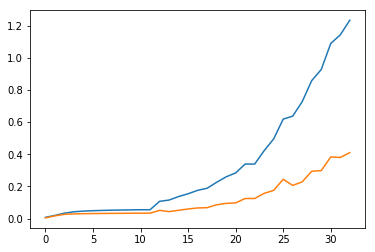

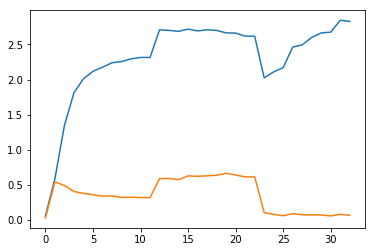

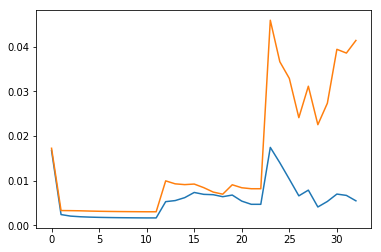

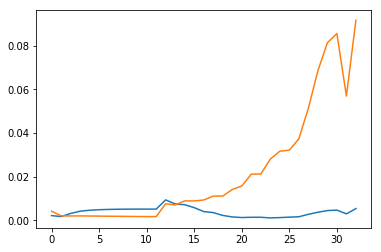

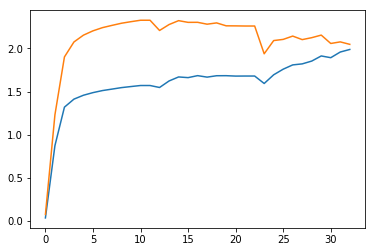

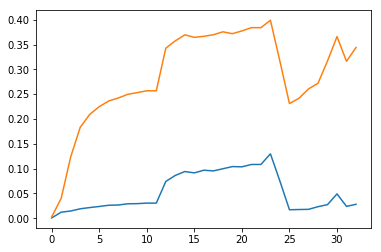

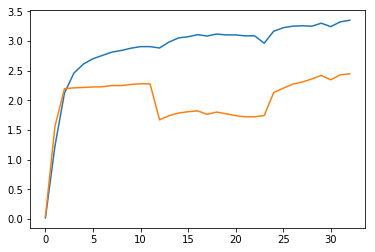

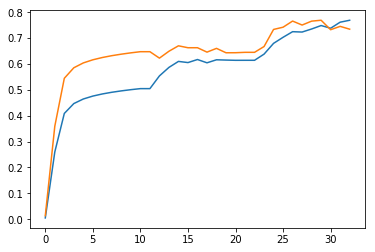

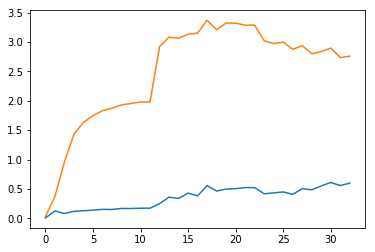

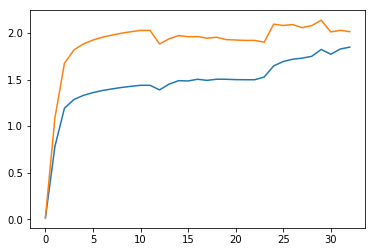

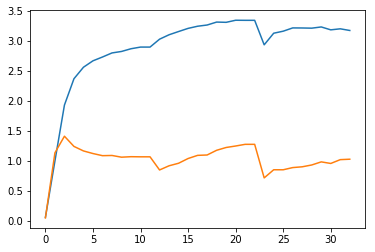

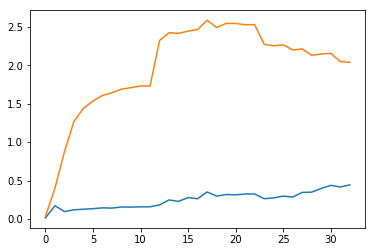

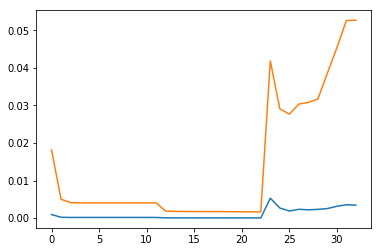

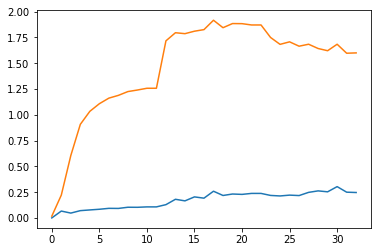

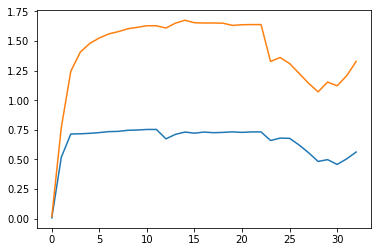

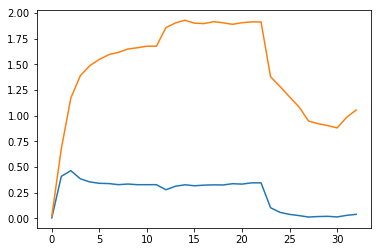

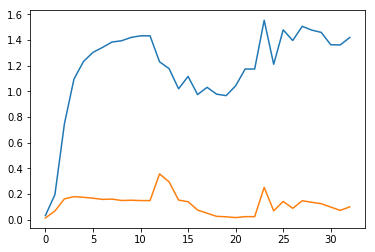

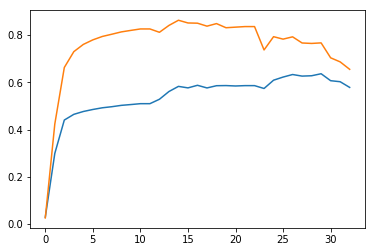

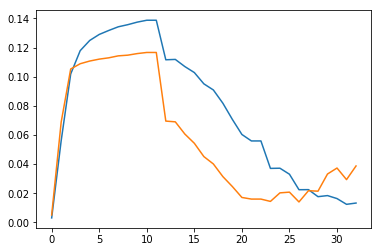

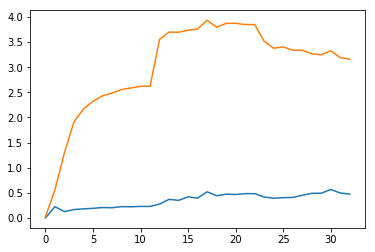

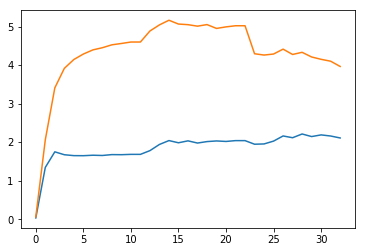

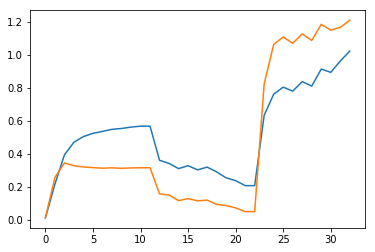

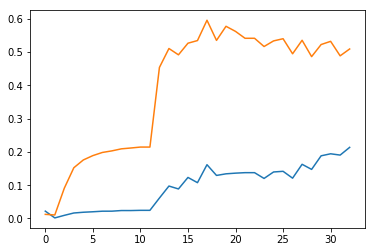

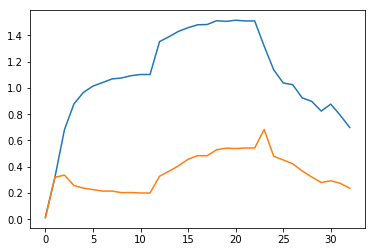

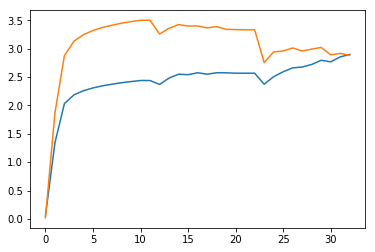

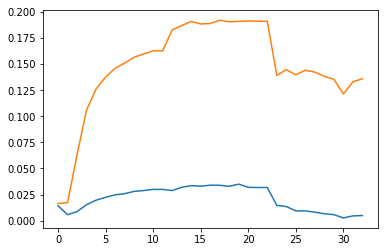

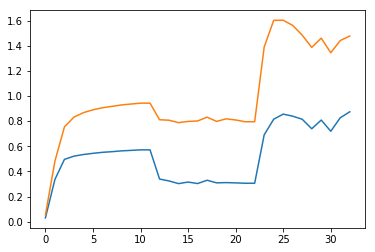

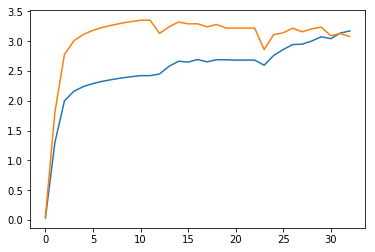

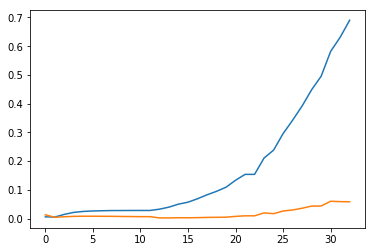

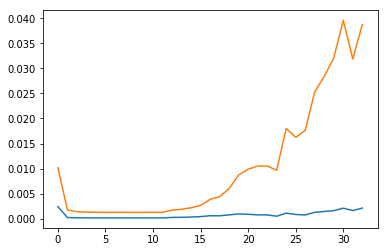

In [50]:
for i in range(num_hidden):
    plt.figure(i)
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[0][i])
    plt.plot(range(len(activation_value_h1[0][i])),activation_value_h1[1][i])
    #plt.plot(range(22),loss_function_data)
plt.show()

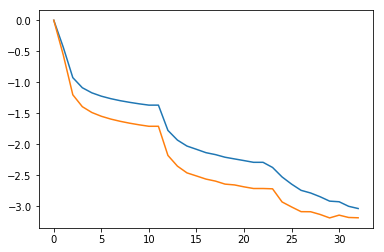

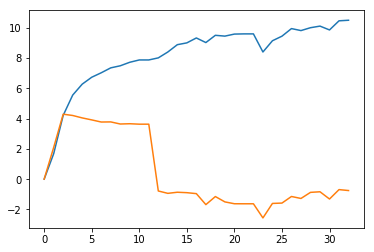

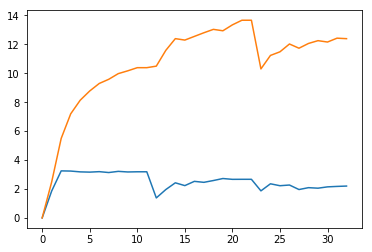

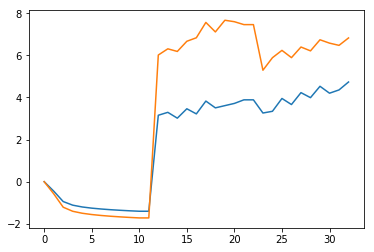

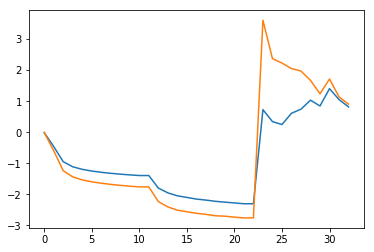

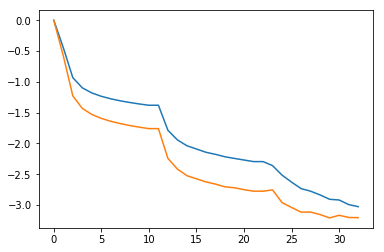

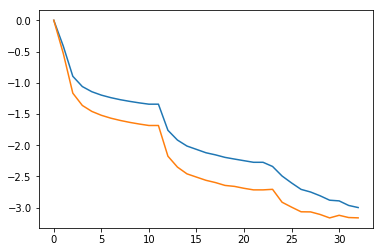

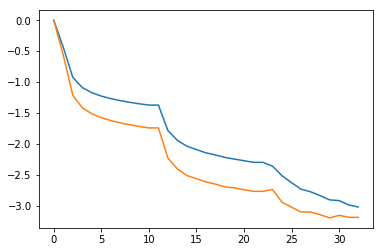

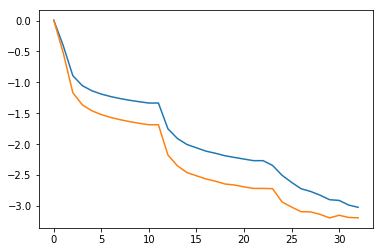

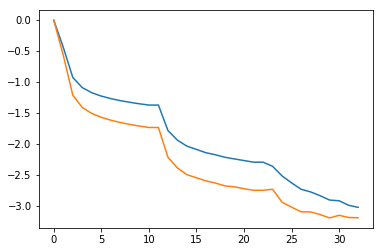

In [51]:
for i in range(num_outputs):
    plt.figure(i)
    plt.plot(range(len(activation_value_h2[0][i])),activation_value_h2[0][i])
    plt.plot(range(len(activation_value_h2[0][i])),activation_value_h2[1][i])
    #plt.plot(range(20),loss_function_data)
plt.show()

## Test Orthogonal 
Neuron activation level for label1 dot neuron activation level for label 2

In [67]:
print(activation_value_h1[0][0])
print(activation_value_h1[1][0])
print(activation_value_h1[0][1])
print(activation_value_h1[1][1])

[2.390414, 2.5085959, 2.574873, 2.619072, 2.6562457, 2.6857324, 2.7080131, 2.7292192, 2.7463212, 2.7631874, 2.0596075, 2.1248302, 2.1775961, 2.2393215, 2.2902155, 2.329325, 2.3577542, 2.3801506, 2.4090595, 2.4411526]
[3.2289736, 3.3653753, 3.4368236, 3.486696, 3.5259075, 3.5593419, 3.5812762, 3.6044111, 3.6202064, 3.6369994, 2.9411983, 2.9935234, 3.0171733, 3.0604043, 3.080704, 3.087708, 3.091588, 3.0810325, 3.082644, 3.0885098]
[0.027147731, 0.031181224, 0.033756707, 0.035733745, 0.03484584, 0.036404308, 0.037421361, 0.037668634, 0.037846345, 0.037347455, 0.050784763, 0.079685226, 0.1053391, 0.11871651, 0.099033535, 0.034622401, 0.012676775, 0.0077794916, 0.0069208709, 0.019444861]
[0.0070660347, 0.0081728939, 0.0091344239, 0.0097543877, 0.0088891685, 0.0093097659, 0.0095294276, 0.0094613349, 0.0093964702, 0.0091321245, 0.32802871, 0.35267985, 0.31201836, 0.28562921, 0.20135634, 0.093166806, 0.061177455, 0.047643144, 0.046462886, 0.095204704]


In [40]:
np.dot([1,2,3],[4,5,6])

32

In [58]:
dot_product=[]
for i in range(30):
    #dot_product.append([])
    dot_product.append(np.dot(activation_value_h1[0][i],activation_value_h1[1][i]))
# dot_result=[]
# for i in range(num_hidden):
#     dot_result.append([])
#     for j in range(20):
#         dot_result[-1].append(dot_product[j][i])
# print(dot_result[0])

In [88]:
print(dot_product)

[0.18722047, 16.012114, 0.00073380762, 0.00055857142, 69.080421, 0.30150846, 112.08687, 6.0551028, 16.16293, 52.554089, 69.921463, 9.1301661, 8.2526267e-06, 5.0714025, 21.004978, 10.129657, 3.9820986, 8.0220137, 0.18434632, 20.53076]


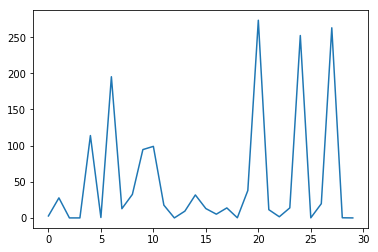

In [60]:
plt.plot(range(30),dot_product)
plt.show()

In [22]:
activation_value_h1[0][i][10]

2.1501746

## Project into 2D space with x axis number 1 and y axis number 2

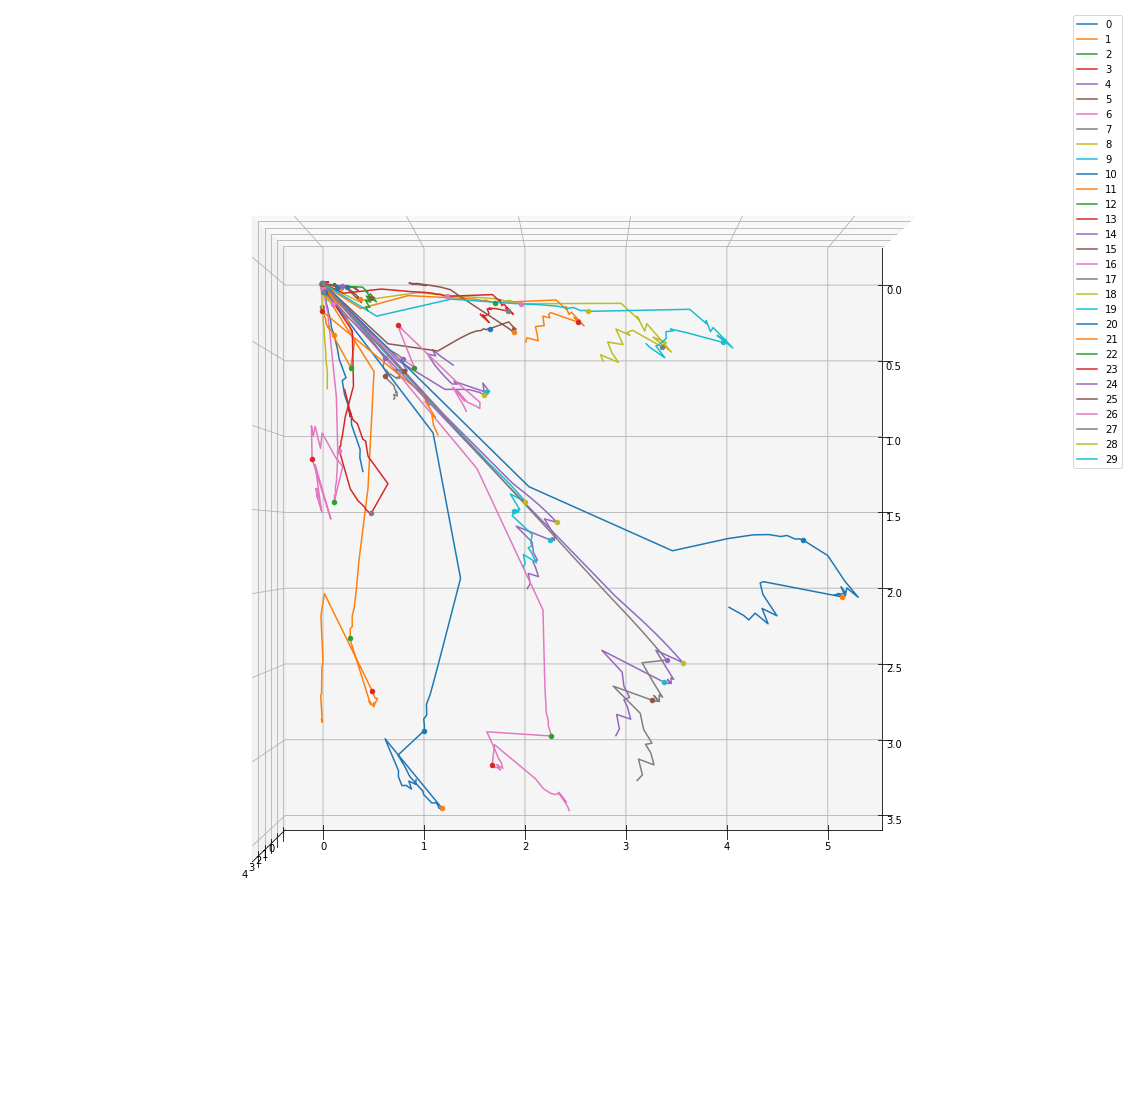

In [75]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig=plt.figure(0,figsize=(20,20))
ax=fig.gca(projection='3d')
for i in range(30):
    ax.plot(activation_value_h1[0][i],activation_value_h1[1][i],activation_value_h1[2][i],label=i)
    #plt.plot(activation_value_h1[0][i],activation_value_h1[1][i],label=i)
    ax.scatter(activation_value_h1[0][i][11],activation_value_h1[1][i][11],activation_value_h1[2][i][11],'ro',label=None)
    ax.scatter(activation_value_h1[0][i][22],activation_value_h1[1][i][22],activation_value_h1[2][i][22],'ro',label=None)
ax.legend()
ax.view_init(90, 0)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)
#     plt.show()
# fig=plt.figure(1,figsize=(20,15))
# for i in range(10):
#     plt.plot(activation_value_h2[0][i],activation_value_h2[1][i],label=i)
#     plt.plot(activation_value_h2[0][i][11],activation_value_h2[1][i][11],'ro',label=None)
# plt.legend()


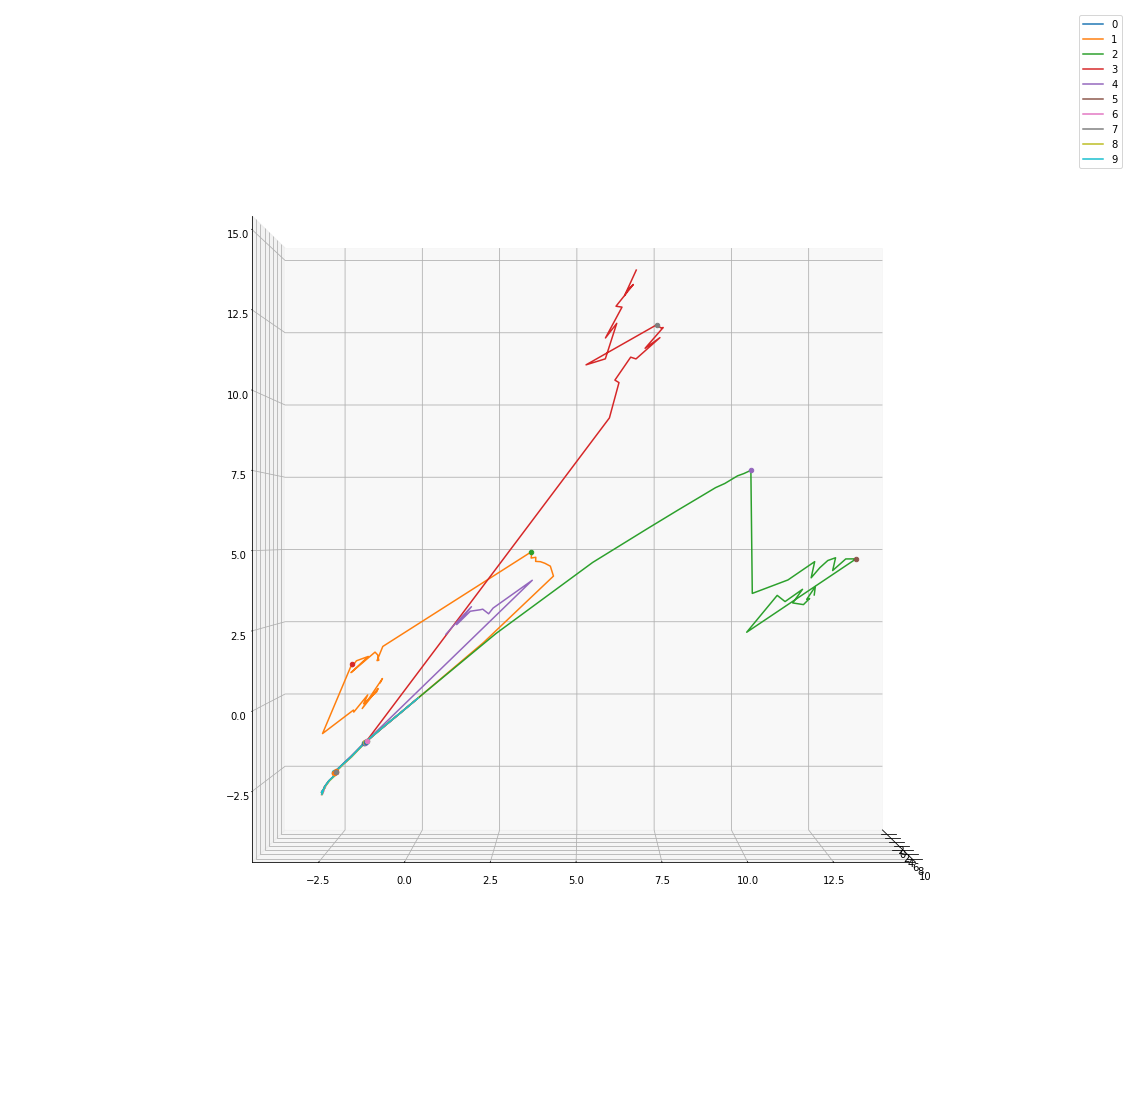

In [74]:
fig=plt.figure(0,figsize=(20,20))
ax=fig.gca(projection='3d')
for i in range(10):
    ax.plot(activation_value_h2[0][i],activation_value_h2[1][i],activation_value_h2[2][i],label=i)
    #plt.plot(activation_value_h1[0][i],activation_value_h1[1][i],label=i)
    ax.scatter(activation_value_h2[0][i][11],activation_value_h2[1][i][11],activation_value_h2[2][i][11],'ro',label=None)
    ax.scatter(activation_value_h2[0][i][22],activation_value_h2[1][i][22],activation_value_h2[2][i][22],'ro',label=None)
ax.legend()
ax.view_init(0, 0)

## Prediction

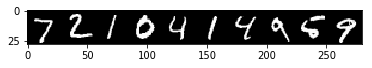

model predictions are: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  6.  9.]
<NDArray 10 @gpu(0)>
true labels: 
[ 7.  2.  1.  0.  4.  1.  4.  9.  5.  9.]
<NDArray 10 @cpu(0)>


In [32]:

def model_predict(net,data):
    output=net(data)
    return nd.argmax(output,axis=1)
samples=10
sample_data=gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False,transform=transform),samples,shuffle=False)
#sample_data=mx.gluon.data.DataLoader(mnist_test,samples,shuffle=True)
for i, (data, label) in enumerate(sample_data):
    data=data.as_in_context(model_ctx)
    im=nd.transpose(data,(1,0,2,3))
    im=nd.reshape(im,(28,10*28,1))
    imtiles=nd.tile(im,(1,1,3))
    
    plt.imshow(imtiles.asnumpy())
    plt.show()
    pred=model_predict(net,data.reshape((-1,784)))
    print('model predictions are:', pred)
    print('true labels:', label)
    break